In [2]:
# importing necessaries libs to explore the data and build the ML model

# data analysis manipulation
import pandas as pd
import numpy as np

# data viz
from matplotlib import pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import ensemble, svm

# get better visualisation on Jupyter
%matplotlib inline

In [3]:
# read datasets
train = pd.read_csv('/home/viktor/Documentos/DED/train.csv')
test = pd.read_csv('/home/viktor/Documentos/DED/test.csv')

# display a sample
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# display dataframe description
train.info()

# show null values
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 1 means that the passenger was alone
train['Family_Size']=train['SibSp']+train['Parch']+1
test['Family_Size']=test['SibSp']+test['Parch']+1

# convert data types to improve data manipulation
def convert_s(sex):
    if sex == 'female':
        return 0
    else:
        return 1

def convert_fam(fam):
    if fam == 1:
        return 1
    else:
        return 2

# add new features to dataset
train['Gender'] = train['Sex'].map(convert_s)
test['Gender'] = test['Sex'].map(convert_s)

train['Family'] = train['Family_Size'].map(convert_fam)
test['Family'] = test['Family_Size'].map(convert_fam)

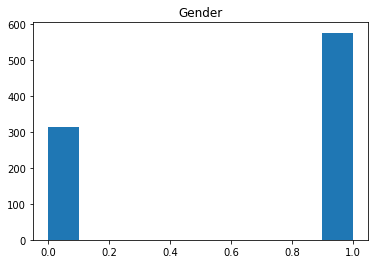

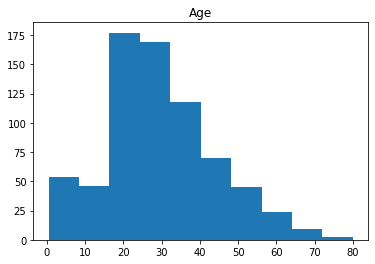

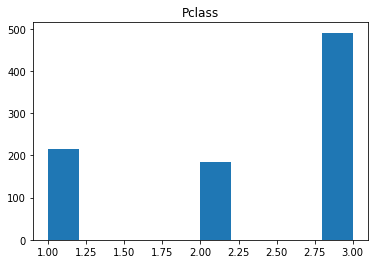

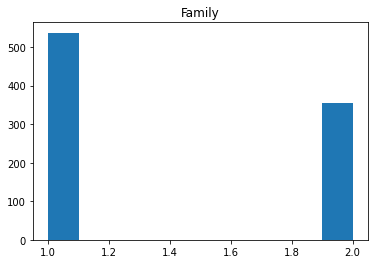

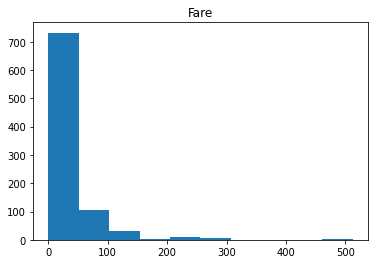

In [6]:
#choosing the relevant variables
## dataframe class for data manipulation improvment during exploration
df = train[['Gender', 'Age', 'Pclass', 'Family', 'Fare']]

# analyzing its distribution
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

          Gender       Age    Pclass    Family      Fare
Gender  1.000000  0.093254  0.131900 -0.303646 -0.182333
Age     0.093254  1.000000 -0.369226 -0.198270  0.096067
Pclass  0.131900 -0.369226  1.000000 -0.135207 -0.549500
Family -0.303646 -0.198270 -0.135207  1.000000  0.271832
Fare   -0.182333  0.096067 -0.549500  0.271832  1.000000


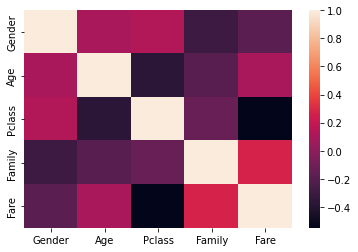

In [9]:
# verifying if we've correlated features between them
print(df.corr())
sns.heatmap(df.corr())
plt.show()

In [13]:
# Populate NaN values with the mean
train['Age_Filled'] = train['Age'].groupby([train['Gender']]).apply(lambda x: x.fillna(x.mean()))
test['Age_Filled'] = test['Age'].groupby([train['Gender']]).apply(lambda x: x.fillna(x.mean()))

train['Fare_Filled'] = train['Fare'].groupby([train['Family_Size']]).apply(lambda x: x.fillna(x.mean()))
test['Fare_Filled'] = test['Fare'].groupby([train['Family_Size']]).apply(lambda x: x.fillna(x.mean()))

# series with filled ages
groupby_result = train.Age_Filled[train.Age.isnull()]

# checking the new feature
display(train[train.Age.isnull()].head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Gender,Family,Age_Filled,Fare_Filled
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,1,30.726645,8.4583
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,1,1,30.726645,13.0000
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,0,1,27.915709,7.2250
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1,1,30.726645,7.2250
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,0,1,27.915709,7.8792


## The first model chosen was the Random Forest Classifier method.

    The accuracy was higher (around 8.0) but lower comparing to others on Kaggle, that's why I rather to use the SVC model. Altough it's not as performatic as Forest Classifier it showed a better result regarding the accuracy.

In [14]:
# variable for ML model without NaN values
var=['Gender', 'Age_Filled', 'Pclass', 'Family', 'Fare_Filled']

In [15]:
# defining vars to implementate model
x = train[var]
y = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [16]:
# function to apply the model
model = svm.SVC(probability=True, kernel='linear')

# training model
model.fit(x_train, y_train)

# predicting
model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1])

In [17]:
# check score accuracy
round(model.score(x_test, y_test)*100,1)

80.6

In [12]:
# apply model
pred = model.predict(test[var])

In [ ]:
# create pandas series with our result
submission = pd.Series(pred, index=test['PassengerId'], name ='Survived')

# verify amount before submit
submission.shape

# saving results
# submission.to_csv('/home/viktor/Documentos/DED/titanic.csv', header=True)